In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../data/advertising.csv")

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
def hypothesis(X,theta):
    return np.dot(X,theta) # product of matrices

def compute_cost(X,y,theta):
    m = len(y)
    predictions = hypothesis(X,theta)
    sq_errors = (predictions - y) ** 2
    J = 1/2 * (1/m) * np.sum(sq_errors) # compute cost j(theta)
    return J

def gradient_descent(X,y,theta,alpha,num_iters):
    m = len(y)
    j_history = []

    for i in range(num_iters):
        predictions = hypothesis(X,theta)
        errors = predictions - y
        theta = theta - (alpha/m) * (X.T.dot(errors))
        j_history.append(compute_cost(X,y,theta))

    return theta, j_history # return final parameters and cost history

def newton_method(X,y,theta,num_iters):
    m = len(y)
    j_history = []

    for i in range (num_iters):
        predictions = hypothesis(X,theta)
        errors = predictions - y
        gradient = (1/m) * (X.T.dot(errors))
        hessian = (1/m) * (X.T.dot(X))
        theta = theta - np.linalg.inv(hessian).dot(gradient)
        j_history.append(compute_cost(X,y,theta))

    return theta, j_history 

def padronize_column(column):
    mean = np.mean(column)
    std = np.std(column)
    return (column - mean) / std # padronizing data of column
    
# Preparing data

X = df['Newspaper'].values.reshape(-1,1) # feature matrix, reshaped to be a 2D array
y = df['Sales'].values.reshape(-1,1) # target vector, reshaped to be a 2D array

m = len(y) # number of training examples
X_b = np.c_[np.ones((m,1)), X]  # add bias term
X_b[:,1] = padronize_column(X_b[:,1]) # padronizing feature column
y = padronize_column(y) # padronizing target column
theta_initial = np.zeros((2,1)) # initial theta parameters randomly set to zero
alpha = 0.01 # learning rate
num_iters = 600 # number of iterations for gradient descent


theta_final_gradient, j_history_gradient = gradient_descent(X_b,y,theta_initial,alpha,num_iters) # run gradient descent

theta_final_newton, j_history_newton = newton_method(X_b,y,theta_initial,num_iters) # run newton method

print(f"""Final theta parameters of gradient descent, theta 0 and theta 1 ,respectively: {theta_final_gradient.ravel()}
Final theta parameters of newton method, theta 0 and theta 1 ,respectively: {theta_final_newton.ravel()}""") # ravel to print as 1D array

Final theta parameters of gradient descent, theta 0 and theta 1 ,respectively: [-3.20699023e-16  1.57580131e-01]
Final theta parameters of newton method theta 0 and theta 1 ,respectively: [-3.45936618e-16  1.57960026e-01]


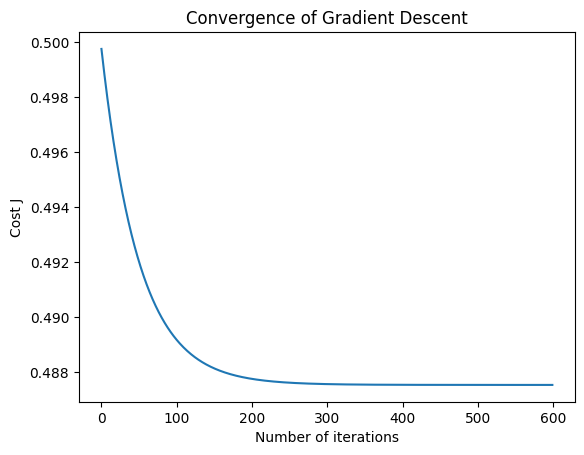

In [5]:
import matplotlib.pyplot as plt

plt.plot(range(len(j_history_gradient)), j_history_gradient)
plt.xlabel("Number of iterations")
plt.ylabel("Cost J")
plt.title("Convergence of Gradient Descent")
plt.show()

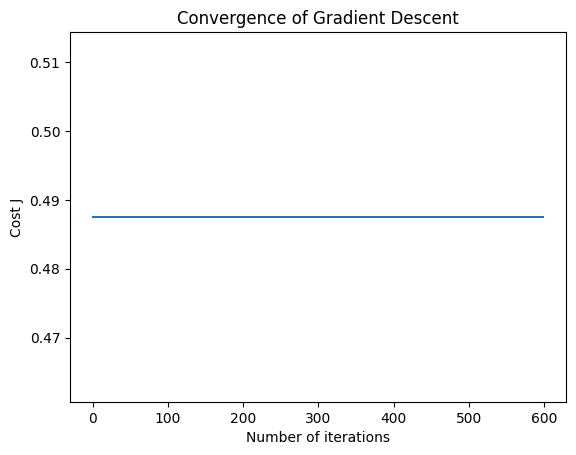

In [6]:

plt.plot(range(len(j_history_newton)), j_history_newton)
plt.xlabel("Number of iterations")
plt.ylabel("Cost J")
plt.title("Convergence of Gradient Descent")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

linear_sklearn = LinearRegression()
linear_sklearn.fit(X,y)

print(f"Sklearn model coefficients: intercept/theta 0 = {linear_sklearn.intercept_[0]}, slope/theta 1 = {linear_sklearn.coef_[0][0]}")

Sklearn model coefficients: intercept/theta0 = -0.2221638315680499, slope/theta1 = 0.007271186475356733


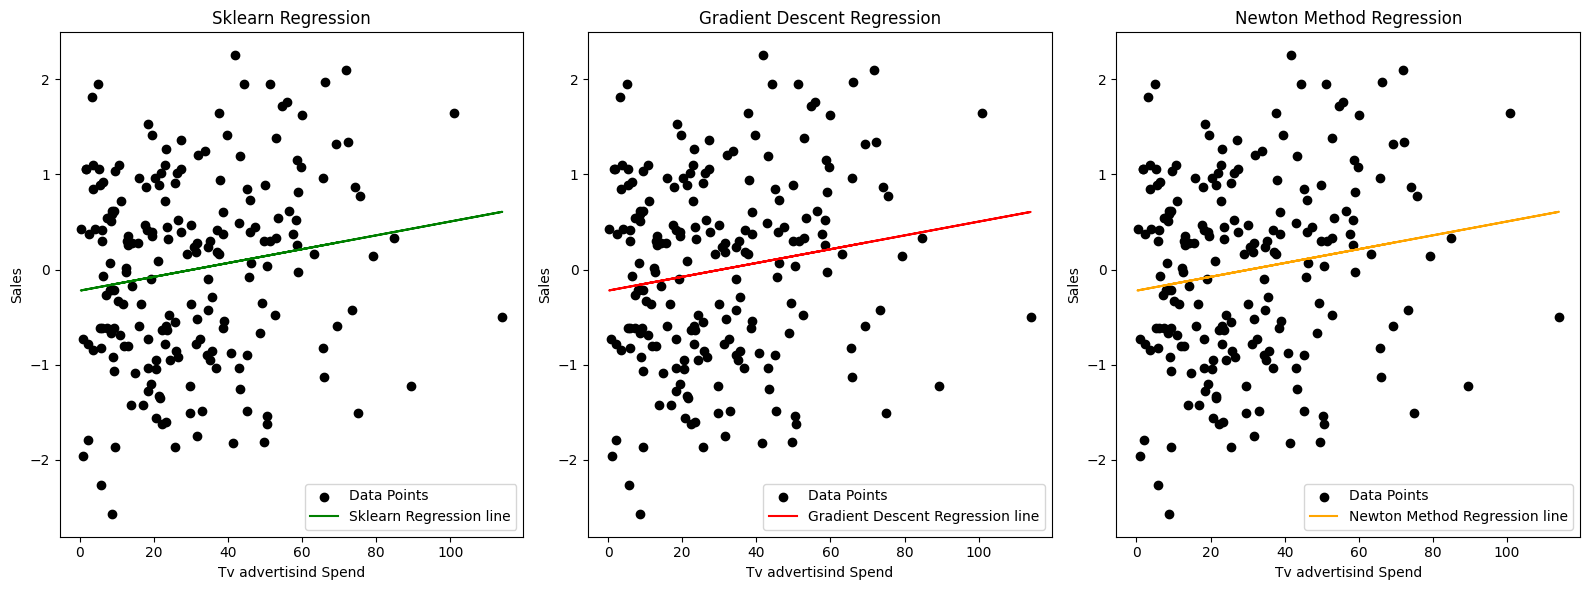

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

models = [
    LinearRegression().fit(X,y).predict(X),
    hypothesis(X_b,theta_final_gradient),
    hypothesis(X_b,theta_final_newton)
]

name_models = ['Sklearn Regression', 'Gradient Descent Regression', 'Newton Method Regression']
colors = ['green', 'red', 'orange']

for i,model in enumerate(models):
    axs[i].scatter(X, y, color='black', label='Data Points')
    axs[i].plot(X, model, color= f'{colors[i]}', label=f'{name_models[i]} line')
    axs[i].set_xlabel("Tv advertisind Spend")
    axs[i].set_ylabel("Sales")
    axs[i].legend()
    if i == 0:
        axs[i].set_title("Sklearn Regression")
    elif i == 1:
        axs[i].set_title("Gradient Descent Regression")
    else:
        axs[i].set_title("Newton Method Regression")

plt.tight_layout()
plt.show()

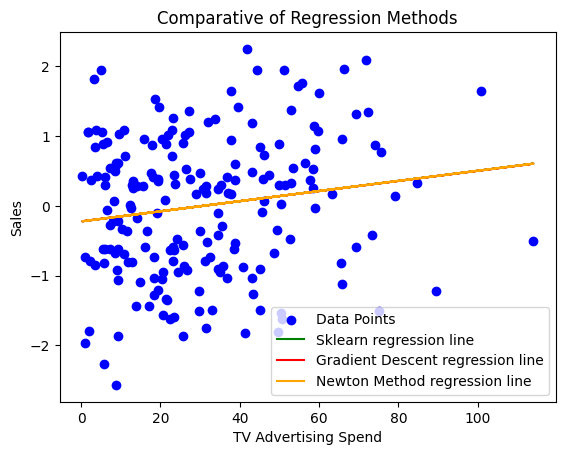

In [9]:
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, linear_sklearn.predict(X), color='green', label='Sklearn regression line')
plt.plot(X, hypothesis(X_b, theta_final_gradient), color='red', label='Gradient Descent regression line')
plt.plot(X, hypothesis(X_b, theta_final_newton), color='orange', label='Newton Method regression line')
plt.xlabel("TV Advertising Spend")
plt.ylabel("Sales")
plt.title("Comparative of Regression Methods")
plt.legend()
plt.show()